# EDA and FileHandling

In [3]:
from os import mkdir, path
from shutil import copy
from sys import platform
import glob
import matplotlib.pyplot as plt
from random import seed, sample
import seaborn as sns
import pandas as pd
from helper_functions import plot_sample_images, shuffle_list, check_if_cat_windows, check_if_cat_mac

## b)

In [4]:
current_directory = path.abspath("")
if platform == "darwin":
    images = [
        (plt.imread(file_path), check_if_cat_mac(file_path), file_path)
        for file_path in glob.glob(
            f"{current_directory}/original_dataset/train/train/*.jpg"
        )
    ]
if platform == "win32":
    images = [
        (plt.imread(file_path), check_if_cat_windows(file_path), file_path)
        for file_path in glob.glob(
            f"{current_directory}/original_dataset/train/train/*.jpg"
        )
    ]

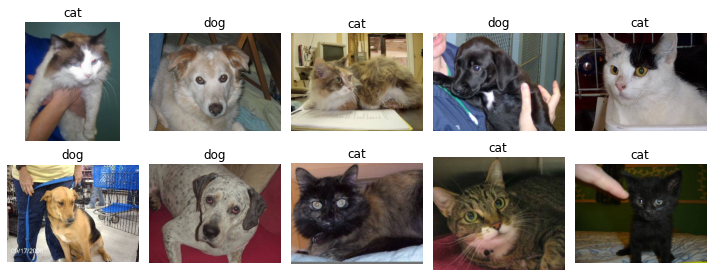

In [5]:
seed(404)
plot_sample_images(sample(images, 10))

## c)

In [6]:
folder_name_structure = ('experiment_small_dataset', 'experiment_tiny_dataset')
sub_folder_structure = ('test', 'train', 'val')

try:
    mkdir(f'{current_directory}/original_dataset')
    for folder_name in folder_name_structure:
        root_folder_name = f'{current_directory}/{folder_name}'
        mkdir(root_folder_name)
        for sub_folder_name in sub_folder_structure:
            mkdir(f'{root_folder_name}/{sub_folder_name}')
except:
    pass

## d)

In [7]:
seed(418)
cat_images = shuffle_list([image[2] for image in images if image[1] == 'cat'])
dog_images = shuffle_list([image[2] for image in images if image[1] == 'dog'])

cat_images[0], dog_images[0]

('c:\\Users\\CreativeZone2\\DevArea\\ai21-deep-learning\\lab/original_dataset/train/train\\cat.6411.jpg',
 'c:\\Users\\CreativeZone2\\DevArea\\ai21-deep-learning\\lab/original_dataset/train/train\\dog.9695.jpg')

In [8]:
def move_image_files_from_list_into_train_val_test_datasets(image_list:list):
    train_file_names = image_list[:800]
    val_file_names = image_list[800:1000]
    test_file_names = image_list[1000:1500]
    def copy_files(file_names, target_folder):
        for file_name in file_names:
            copy(file_name, target_folder)

    copy_files(train_file_names, f'{current_directory}/experiment_small_dataset/train')
    copy_files(val_file_names, f'{current_directory}/experiment_small_dataset/val')
    copy_files(test_file_names, f'{current_directory}/experiment_small_dataset/test')


move_image_files_from_list_into_train_val_test_datasets(cat_images)
move_image_files_from_list_into_train_val_test_datasets(dog_images)

## e)

In [9]:
if platform == "darwin":
    train_experiment_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_mac(file_path, return_one_hot=True))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/train/*.jpg"
        )
    ])

if platform == "win32":
    train_experiment_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_windows(file_path, return_one_hot=True))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/train/*.jpg"
        )
    ])

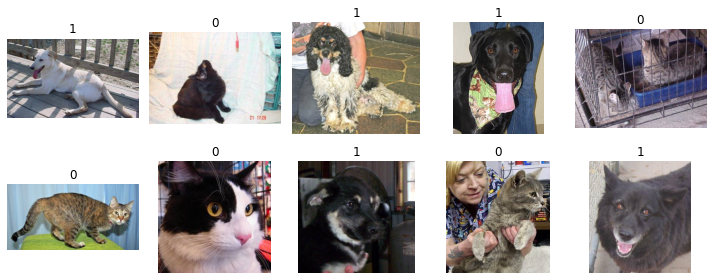

In [10]:
plot_sample_images(train_experiment_images[:10])

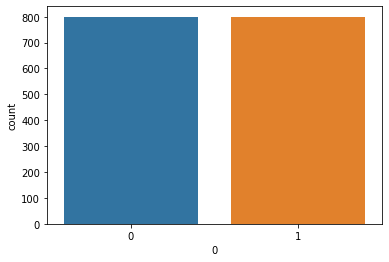

In [11]:
sns.countplot(x=pd.DataFrame([image[1] for image in train_experiment_images])[0]);